# Predicting companies getting attacked by a hedge fund

In this notebook, Python-based Machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether a company getting attacked by a hedge fun or not.

We're going to take the following approach:

- Problem definition
- Data
- Evaluation
- Features
- Modelling

## Problem Definition

> The original dataset has 32 variables including the companies that got attacked by a hedge fund. We will analyze the dataset and find a line. The area above the line is positive (1) and area below it is negetive (0)

here,
- 0 : Companies will not get attacked by hedge fund
- 1 : Companies will get attacked by hedge fund

## Evaluation
If we can reach 90% accuracy at predicting, we'll pursue the project.



## Features

1. Attack: Shows which companies got attacked.
2. Size_of_Group_Composition: Composition is usually considered in terms of how individual member characteristics will affect group cohesion or compatibility and subsequently how the group interacts.
3. Bankruptcy probability: Bankruptcy risk refers to the likelihood that a company will be unable to meet its debt obligations. It is the probability of a firm becoming insolvent due to its inability to service its debt.
4. Debt coefficient: The debt ratio measures the amount of leverage used by a company in terms of total debt to total assets. A debt ratio greater than 1.0 (100%) tells you that a company has more debt than assets.
5. Solvency: Solvency is the ability of a company to meet its long-term debts and financial obligations.
6. Invested Capital: Invested capital is the total amount of money raised by a company by issuing securities to equity shareholders and debt to bondholders, where the total debt and capital lease obligations are added to the amount of equity issued to investors.
7. Net equity: Net equity value is defined as the difference between the fair market value of business assets and its liabilities.
8. ROA: Return on assets (ROA) is a financial ratio that shows the percentage of profit that a company earns in relation to its overall resources (total assets).
9. ROCE: Return on capital employed (ROCE) is a financial ratio that can be used in assessing a company's profitability and capital efficiency. In other words, the ratio can help to understand how well a company is generating profits from its capital.
10. R&D expenses: Research and development (R&D) expenses are associated directly with the research and development of a company's goods or services and any intellectual property generated in the process.

### Preparing the tools

We're going to use `pandas`, `Matplotlib` and `NumPy` for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# we want our plots to appear inside the notebook
%matplotlib inline

# Models from scikit-learn (sklearn)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Load the data

In [2]:
data = pd.read_csv("data/databaseenglish.csv")
#It whill show how many row and columns are present in the dataset
data.shape

(1407, 32)

We have 1407 rows and 32 columns

### Data Exploration (exploratory data analysis or EDA)
The goal here is to find out more about the data and become a subject matter export on the dataset you're working with.

In [3]:
data.head()

,company_name,attack,year_attack,Size_of_Group_Composition,BvD_independent_indicator,Number_of_shareholders,Number_of_effective_beneficiaries_def_10_10,Number_of_effective_beneficiaries_def_10_50,Number_of_effective_beneficiaries_def_25_25,Number_of_leaders,...,diffmoy_Equity_per_share_EUR,diffmoy_Bankruptcy_probability,diffmoy_Debt_coefficient,diffmoy_Solvency,diffmoy_Returns_invested_capital,diffmoy_Returns_net_equity,diffmoy_ROA_from_profit_before_taxes,diffmoy_ROCE_from_net_income1,diffmoy_R&D_expenditure_Operating_income,diffmoy_Performance
0,1000MERCIS,0,NaN,8.0,B+,16,3,3,2,14,...,-90.683428,-0.773921,1.80597,2.833689,19.707874,22.18232,10.752391,17.19676,-2.130997,10.63491
1,2CRSI,0,NaN,2.0,D,17,1,1,1,10,...,NaN,NaN,NaN,NaN,16.842874,38.42932,4.496391,19.73776,-2.130997,-2.84809
2,A S T GROUPE,0,NaN,17.0,A+,10,3,3,0,18,...,-106.614428,0.226079,1.80597,1.833689,29.717874,32.15032,9.710391,20.98376,-2.130997,1.10291
3,A TOUTE VITESSE,0,NaN,2.0,D,1,1,1,1,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A2MICILE EUROPE,0,NaN,85.0,B+,6,3,3,2,8,...,NaN,3.226079,-2.19403,-1.166311,24.217874,40.58732,8.750391,14.79276,-2.130997,-2.04609


In [4]:
data.tail()

,company_name,attack,year_attack,Size_of_Group_Composition,BvD_independent_indicator,Number_of_shareholders,Number_of_effective_beneficiaries_def_10_10,Number_of_effective_beneficiaries_def_10_50,Number_of_effective_beneficiaries_def_25_25,Number_of_leaders,...,diffmoy_Equity_per_share_EUR,diffmoy_Bankruptcy_probability,diffmoy_Debt_coefficient,diffmoy_Solvency,diffmoy_Returns_invested_capital,diffmoy_Returns_net_equity,diffmoy_ROA_from_profit_before_taxes,diffmoy_ROCE_from_net_income1,diffmoy_R&D_expenditure_Operating_income,diffmoy_Performance
1402,LATECOERE,1,2018.0,24.0,D,13,5,5,5,60,...,-419.965647,1.304060,2.809989,2.878393,14.126546,10.787897,4.244722,11.326027,0.612442,-1.503889
1403,RENAULT,1,2019.0,697.0,B+,54,0,0,0,127,...,-352.829515,-1.866603,-2.210870,-0.109783,18.726344,23.305537,5.620795,17.239848,0.692457,2.665476
1404,SAFRAN,1,2017.0,420.0,A+,81,0,0,0,151,...,-92.513428,-0.773921,-3.194030,-4.166311,26.359874,41.313320,9.433391,24.008760,6.734003,7.713910
1405,TECHNICOLOR,1,2012.0,213.0,A+,29,0,0,0,73,...,-272.024371,NaN,-3.393283,-4.235103,-7.692155,-159.103644,-8.561945,-9.298498,0.917908,-13.363271
1406,VIVENDI SE,1,2015.0,1999.0,B+,80,1,1,1,166,...,-99.458689,-1.897196,0.820383,0.856710,14.448834,12.369821,6.117768,24.674105,-2.364043,4.546298


In [5]:
# let's find out how many of each class there
data["attack"].value_counts()

0    1376
1      31
Name: attack, dtype: int64

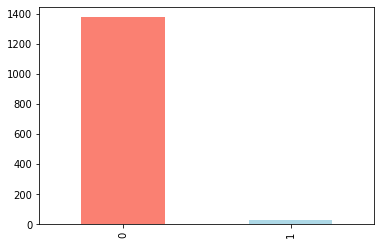

In [6]:
data["attack"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

# Let's save a high quality image of the Graph below
plt.savefig('./graphs and plots/attack_bar_plot.png')

As we can see the probability of finding attacked companies (Probability of getting 1) is very low. We have 31 companies that got attacked by Hedge fund and 1376 that never got attacked.

### Let's find the probability in percentage (%)

In [7]:
attacked = 31
not_attacked = 1376

probability_of_getting_attacked = 31 / (31+1376)
probability_of_not_getting_attacked = 1376/(31+1376)
print(f'Probability of getting attacked: {probability_of_getting_attacked * 100:.1f}%')
print(f'Probability of not getting attacked: {probability_of_not_getting_attacked * 100:.2f}%')

Probability of getting attacked: 2.2%
Probability of not getting attacked: 97.80%


In [8]:
# Let's find some other insofrmation
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 32 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   company_name                                             1407 non-null   object 
 1   attack                                                   1407 non-null   int64  
 2   year_attack                                              31 non-null     float64
 3   Size_of_Group_Composition                                1385 non-null   float64
 4   BvD_independent_indicator                                1407 non-null   object 
 5   Number_of_shareholders                                   1407 non-null   int64  
 6   Number_of_effective_beneficiaries_def_10_10              1407 non-null   int64  
 7   Number_of_effective_beneficiaries_def_10_50              1407 non-null   int64  
 8   Number_of_effective_benefici

### Let's find the missing values

In [9]:
# Let's find out how many missing values are in there
data.isna().sum()

company_name                                                  0
attack                                                        0
year_attack                                                1376
Size_of_Group_Composition                                    22
BvD_independent_indicator                                     0
Number_of_shareholders                                        0
Number_of_effective_beneficiaries_def_10_10                   0
Number_of_effective_beneficiaries_def_10_50                   0
Number_of_effective_beneficiaries_def_25_25                   0
Number_of_leaders                                             0
Number_of_current_leaders                                     0
Number_of_Previous_Leader                                     0
DM_As_any_category                                           29
Manager_Gender                                              101
Manager_Age                                                   0
Manager_Age_group                       

##### There are huge number of missing values

We can follow two steps to solve the problem:
1. Remove the missing rows
2. Fill the missing rows with average / Imaginary Values 

> We will fill the missing data. If we remove the rows, our dataset will get smaller which is not good for the Machine Learning Model to predict accurately

#### Let's make a copy of our original data so that if we make any mistakes, we can always go back and fix the issues

In [10]:
# Make a copy of the original DataFrame to perform edits on

data_tmp = data.copy()

In [11]:
# Let's check we have copied the same data
data_tmp.shape

(1407, 32)

In [12]:
data_tmp

,company_name,attack,year_attack,Size_of_Group_Composition,BvD_independent_indicator,Number_of_shareholders,Number_of_effective_beneficiaries_def_10_10,Number_of_effective_beneficiaries_def_10_50,Number_of_effective_beneficiaries_def_25_25,Number_of_leaders,...,diffmoy_Equity_per_share_EUR,diffmoy_Bankruptcy_probability,diffmoy_Debt_coefficient,diffmoy_Solvency,diffmoy_Returns_invested_capital,diffmoy_Returns_net_equity,diffmoy_ROA_from_profit_before_taxes,diffmoy_ROCE_from_net_income1,diffmoy_R&D_expenditure_Operating_income,diffmoy_Performance
0,1000MERCIS,0,NaN,8.0,B+,16,3,3,2,14,...,-90.683428,-0.773921,1.805970,2.833689,19.707874,22.182320,10.752391,17.196760,-2.130997,10.634910
1,2CRSI,0,NaN,2.0,D,17,1,1,1,10,...,NaN,NaN,NaN,NaN,16.842874,38.429320,4.496391,19.737760,-2.130997,-2.848090
2,A S T GROUPE,0,NaN,17.0,A+,10,3,3,0,18,...,-106.614428,0.226079,1.805970,1.833689,29.717874,32.150320,9.710391,20.983760,-2.130997,1.102910
3,A TOUTE VITESSE,0,NaN,2.0,D,1,1,1,1,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,A2MICILE EUROPE,0,NaN,85.0,B+,6,3,3,2,8,...,NaN,3.226079,-2.194030,-1.166311,24.217874,40.587320,8.750391,14.792760,-2.130997,-2.046090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,LATECOERE,1,2018.0,24.0,D,13,5,5,5,60,...,-419.965647,1.304060,2.809989,2.878393,14.126546,10.787897,4.244722,11.326027,0.612442,-1.503889
1403,RENAULT,1,2019.0,697.0,B+,54,0,0,0,127,...,-352.829515,-1.866603,-2.210870,-0.109783,18.726344,23.305537,5.620795,17.239848,0.692457,2.665476
1404,SAFRAN,1,2017.0,420.0,A+,81,0,0,0,151,...,-92.513428,-0.773921,-3.194030,-4.166311,26.359874,41.313320,9.433391,24.008760,6.734003,7.713910
1405,TECHNICOLOR,1,2012.0,213.0,A+,29,0,0,0,73,...,-272.024371,NaN,-3.393283,-4.235103,-7.692155,-159.103644,-8.561945,-9.298498,0.917908,-13.363271


## Filling the missing values

#### Let's find the columns with names and refactor them as categories

In [13]:
# Find the columns which contain strings
for label, content in data_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

company_name
BvD_independent_indicator
DM_As_any_category
Manager_Gender
Manager_Age_group
Director_Also_shareholder


In [14]:
# Let's turn all of the string value to category values
for label, content in data_tmp.items():
    if pd.api.types.is_string_dtype(content):
        data_tmp[label] = content.astype("category").cat.as_ordered()

In [15]:
data_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 32 columns):
 #   Column                                                   Non-Null Count  Dtype   
---  ------                                                   --------------  -----   
 0   company_name                                             1407 non-null   category
 1   attack                                                   1407 non-null   int64   
 2   year_attack                                              31 non-null     float64 
 3   Size_of_Group_Composition                                1385 non-null   float64 
 4   BvD_independent_indicator                                1407 non-null   category
 5   Number_of_shareholders                                   1407 non-null   int64   
 6   Number_of_effective_beneficiaries_def_10_10              1407 non-null   int64   
 7   Number_of_effective_beneficiaries_def_10_50              1407 non-null   int64   
 8   Number_of_effectiv

###### `We have sucessfully categorized out data `

### Save the preprocessed data

In [16]:
# Export current tmp dataframe
data_tmp.to_csv("./saved data/train_tmp.csv",
             index=False)

In [17]:
# Import preprocessed data

df_tmp = pd.read_csv("./saved data/train_tmp.csv",
                    low_memory=False)

df_tmp.head().T

,0,1,2,3,4
company_name,1000MERCIS,2CRSI,A S T GROUPE,A TOUTE VITESSE,A2MICILE EUROPE
attack,0,0,0,0,0
year_attack,NaN,NaN,NaN,NaN,NaN
Size_of_Group_Composition,8,2,17,2,85
BvD_independent_indicator,B+,D,A+,D,B+
Number_of_shareholders,16,17,10,1,6
Number_of_effective_beneficiaries_def_10_10,3,1,3,1,3
Number_of_effective_beneficiaries_def_10_50,3,1,3,1,3
Number_of_effective_beneficiaries_def_25_25,2,1,0,1,2
Number_of_leaders,14,10,18,14,8


## Fill the  missing Values

#### Fill the numerical values first

In [18]:
# Check all the column with numerical values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)

attack
year_attack
Size_of_Group_Composition
Number_of_shareholders
Number_of_effective_beneficiaries_def_10_10
Number_of_effective_beneficiaries_def_10_50
Number_of_effective_beneficiaries_def_25_25
Number_of_leaders
Number_of_current_leaders
Number_of_Previous_Leader
Manager_Age
Manager_Number_of_companies_in_which_a_function_is_held
diffmoy_Price_earnings_per_share_average
diffmoy_Average_share_return
diffmoy_Capitalization_Equity
diffmoy_Capitalization_Total_balance_sheet_Tobins_Q
diffmoy_Equity_per_share_EUR
diffmoy_Bankruptcy_probability
diffmoy_Debt_coefficient
diffmoy_Solvency
diffmoy_Returns_invested_capital
diffmoy_Returns_net_equity
diffmoy_ROA_from_profit_before_taxes
diffmoy_ROCE_from_net_income1
diffmoy_R&D_expenditure_Operating_income
diffmoy_Performance


In [19]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

year_attack
Size_of_Group_Composition
diffmoy_Price_earnings_per_share_average
diffmoy_Average_share_return
diffmoy_Capitalization_Equity
diffmoy_Capitalization_Total_balance_sheet_Tobins_Q
diffmoy_Equity_per_share_EUR
diffmoy_Bankruptcy_probability
diffmoy_Debt_coefficient
diffmoy_Solvency
diffmoy_Returns_invested_capital
diffmoy_Returns_net_equity
diffmoy_ROA_from_profit_before_taxes
diffmoy_ROCE_from_net_income1
diffmoy_R&D_expenditure_Operating_income
diffmoy_Performance


> Let's fill the year_attack manually 


In [20]:
df_tmp["year_attack"].fillna(2016, inplace=True)

In [21]:
df_tmp.isna().sum()

company_name                                                  0
attack                                                        0
year_attack                                                   0
Size_of_Group_Composition                                    22
BvD_independent_indicator                                     0
Number_of_shareholders                                        0
Number_of_effective_beneficiaries_def_10_10                   0
Number_of_effective_beneficiaries_def_10_50                   0
Number_of_effective_beneficiaries_def_25_25                   0
Number_of_leaders                                             0
Number_of_current_leaders                                     0
Number_of_Previous_Leader                                     0
DM_As_any_category                                           29
Manager_Gender                                              101
Manager_Age                                                   0
Manager_Age_group                       

In [22]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

Size_of_Group_Composition
diffmoy_Price_earnings_per_share_average
diffmoy_Average_share_return
diffmoy_Capitalization_Equity
diffmoy_Capitalization_Total_balance_sheet_Tobins_Q
diffmoy_Equity_per_share_EUR
diffmoy_Bankruptcy_probability
diffmoy_Debt_coefficient
diffmoy_Solvency
diffmoy_Returns_invested_capital
diffmoy_Returns_net_equity
diffmoy_ROA_from_profit_before_taxes
diffmoy_ROCE_from_net_income1
diffmoy_R&D_expenditure_Operating_income
diffmoy_Performance


In [23]:
# Fill the numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells us if the data was missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            # Fill the numeric values with median
            df_tmp[label] = content.fillna(content.median())

In [24]:
# Check if there's any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [25]:
# Check how many examples were missing
df_tmp.diffmoy_Capitalization_Total_balance_sheet_Tobins_Q_is_missing.value_counts()

True     749
False    658
Name: diffmoy_Capitalization_Total_balance_sheet_Tobins_Q_is_missing, dtype: int64

In [26]:
#  Other missing columns
df_tmp.isna().sum()

company_name                                                        0
attack                                                              0
year_attack                                                         0
Size_of_Group_Composition                                           0
BvD_independent_indicator                                           0
Number_of_shareholders                                              0
Number_of_effective_beneficiaries_def_10_10                         0
Number_of_effective_beneficiaries_def_10_50                         0
Number_of_effective_beneficiaries_def_25_25                         0
Number_of_leaders                                                   0
Number_of_current_leaders                                           0
Number_of_Previous_Leader                                           0
DM_As_any_category                                                 29
Manager_Gender                                                    101
Manager_Age         

### Filling and turning categorial variables into numbers

In [27]:
# Check for columns which aren't numerical
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        print(label)

company_name
BvD_independent_indicator
DM_As_any_category
Manager_Gender
Manager_Age_group
Director_Also_shareholder


In [28]:
# Turn Categorial variables into number and fill missing data
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to indicate whether sample had missing values
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        # Turn Categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes+1

In [29]:
pd.Categorical(df_tmp["company_name"]).codes+1

array([   1,    2,    3, ..., 1150, 1294, 1386], dtype=int16)

In [30]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407 entries, 0 to 1406
Data columns (total 53 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   company_name                                                    1407 non-null   int16  
 1   attack                                                          1407 non-null   int64  
 2   year_attack                                                     1407 non-null   float64
 3   Size_of_Group_Composition                                       1407 non-null   float64
 4   BvD_independent_indicator                                       1407 non-null   int8   
 5   Number_of_shareholders                                          1407 non-null   int64  
 6   Number_of_effective_beneficiaries_def_10_10                     1407 non-null   int64  
 7   Number_of_effective_beneficiaries_def_10_50        

In [31]:
df_tmp.head().T

,0,1,2,3,4
company_name,1,2,3,4,5
attack,0,0,0,0,0
year_attack,2016,2016,2016,2016,2016
Size_of_Group_Composition,8,2,17,2,85
BvD_independent_indicator,6,10,3,10,6
Number_of_shareholders,16,17,10,1,6
Number_of_effective_beneficiaries_def_10_10,3,1,3,1,3
Number_of_effective_beneficiaries_def_10_50,3,1,3,1,3
Number_of_effective_beneficiaries_def_25_25,2,1,0,1,2
Number_of_leaders,14,10,18,14,8


In [32]:
df_tmp.isna().sum()


company_name                                                      0
attack                                                            0
year_attack                                                       0
Size_of_Group_Composition                                         0
BvD_independent_indicator                                         0
Number_of_shareholders                                            0
Number_of_effective_beneficiaries_def_10_10                       0
Number_of_effective_beneficiaries_def_10_50                       0
Number_of_effective_beneficiaries_def_25_25                       0
Number_of_leaders                                                 0
Number_of_current_leaders                                         0
Number_of_Previous_Leader                                         0
DM_As_any_category                                                0
Manager_Gender                                                    0
Manager_Age                                     

### `We removed the missing values`

Now that all of the data is numerical as well as our dataframe has no missing values. we should be able to build a machine learning model.

In [33]:
df_tmp


,company_name,attack,year_attack,Size_of_Group_Composition,BvD_independent_indicator,Number_of_shareholders,Number_of_effective_beneficiaries_def_10_10,Number_of_effective_beneficiaries_def_10_50,Number_of_effective_beneficiaries_def_25_25,Number_of_leaders,...,diffmoy_ROA_from_profit_before_taxes_is_missing,diffmoy_ROCE_from_net_income1_is_missing,diffmoy_R&D_expenditure_Operating_income_is_missing,diffmoy_Performance_is_missing,company_name_is_missing,BvD_independent_indicator_is_missing,DM_As_any_category_is_missing,Manager_Gender_is_missing,Manager_Age_group_is_missing,Director_Also_shareholder_is_missing
0,1,0,2016.0,8.0,6,16,3,3,2,14,...,False,False,False,False,False,False,False,False,False,False
1,2,0,2016.0,2.0,10,17,1,1,1,10,...,False,False,False,False,False,False,False,False,False,False
2,3,0,2016.0,17.0,3,10,3,3,0,18,...,False,False,False,False,False,False,False,False,False,False
3,4,0,2016.0,2.0,10,1,1,1,1,14,...,True,True,True,True,False,False,False,False,False,False
4,5,0,2016.0,85.0,6,6,3,3,2,8,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,760,1,2018.0,24.0,10,13,5,5,5,60,...,False,False,False,False,False,False,False,False,False,False
1403,1121,1,2019.0,697.0,6,54,0,0,0,127,...,False,False,False,False,False,False,False,False,False,False
1404,1150,1,2017.0,420.0,3,81,0,0,0,151,...,False,False,False,False,False,False,False,False,False,False
1405,1294,1,2012.0,213.0,3,29,0,0,0,73,...,False,False,False,False,False,False,False,False,False,False


In [34]:
len(df_tmp)

1407

In [35]:
df_tmp.describe()

,company_name,attack,year_attack,Size_of_Group_Composition,BvD_independent_indicator,Number_of_shareholders,Number_of_effective_beneficiaries_def_10_10,Number_of_effective_beneficiaries_def_10_50,Number_of_effective_beneficiaries_def_25_25,Number_of_leaders,...,diffmoy_Equity_per_share_EUR,diffmoy_Bankruptcy_probability,diffmoy_Debt_coefficient,diffmoy_Solvency,diffmoy_Returns_invested_capital,diffmoy_Returns_net_equity,diffmoy_ROA_from_profit_before_taxes,diffmoy_ROCE_from_net_income1,diffmoy_R&D_expenditure_Operating_income,diffmoy_Performance
count,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,...,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000,1407.000000
mean,704.000000,0.022033,2015.995736,219.393746,8.504620,11.282161,2.061123,1.380242,0.921819,25.043355,...,-55.478811,-0.183618,-0.061058,-0.053405,7.017667,6.100213,1.851500,7.068997,-1.106490,0.122832
std,406.310226,0.146842,0.361731,656.962912,2.788123,18.594669,4.200584,2.657228,2.177638,22.773458,...,366.268227,2.003701,2.249849,2.557584,42.612536,54.623882,14.084476,41.162263,5.441987,17.782181
min,1.000000,0.000000,2010.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-441.888515,-2.773921,-3.393283,-4.235103,-838.861126,-947.439680,-95.839609,-861.824240,-2.779997,-98.674090
25%,352.500000,0.000000,2016.000000,0.000000,6.000000,2.000000,0.000000,0.000000,0.000000,9.000000,...,-101.471428,-1.773921,-2.194030,-1.166311,13.650874,13.014320,3.437391,13.794760,-2.130997,0.379410
50%,704.000000,0.000000,2016.000000,10.000000,10.000000,3.000000,1.000000,1.000000,0.000000,21.000000,...,-101.471428,-0.773921,-0.194030,-0.166311,13.650874,13.921820,4.423391,13.794760,-2.130997,0.401410
75%,1055.500000,0.000000,2016.000000,97.500000,10.000000,12.000000,2.000000,2.000000,1.000000,34.000000,...,-101.471428,0.226079,1.805970,0.833689,13.650874,15.334320,5.237391,13.794760,-2.130997,0.424910
max,1407.000000,1.000000,2019.000000,15445.000000,11.000000,115.000000,54.000000,40.000000,39.000000,190.000000,...,7532.990572,5.226079,3.805970,5.833689,165.769874,287.269320,69.842391,168.343760,89.637003,95.271910


### Hedge Fund Attack Frequency according to Capitalization Total balance sheet Tobin's Q

In [36]:
df_tmp.diffmoy_Capitalization_Total_balance_sheet_Tobins_Q_is_missing.value_counts()

True     749
False    658
Name: diffmoy_Capitalization_Total_balance_sheet_Tobins_Q_is_missing, dtype: int64

In [37]:
# Compare attack column with Capitalization Total balance sheet Tobin's Q column

pd.crosstab(df_tmp.attack, df_tmp.diffmoy_Capitalization_Total_balance_sheet_Tobins_Q_is_missing)

diffmoy_Capitalization_Total_balance_sheet_Tobins_Q_is_missing,False,True
attack,,
0,635,741
1,23,8


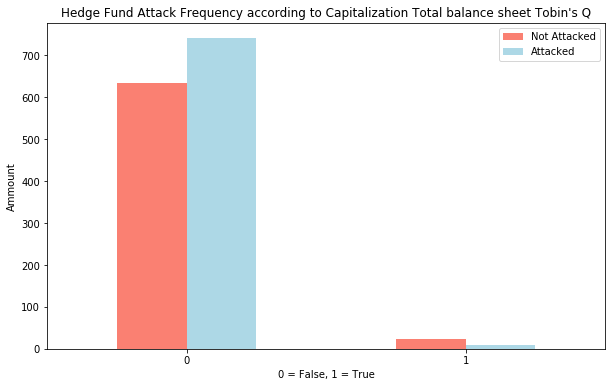

In [38]:
# create a plot of crosstab
pd.crosstab(df_tmp.attack, df_tmp.diffmoy_Capitalization_Total_balance_sheet_Tobins_Q_is_missing).plot(kind='bar',
                                                                                                   figsize=(10,6),
                                                                                               color=["salmon", "lightblue"])

plt.title("Hedge Fund Attack Frequency according to Capitalization Total balance sheet Tobin's Q")
plt.xlabel("0 = False, 1 = True")
plt.ylabel("Ammount")
plt.legend(["Not Attacked", "Attacked"])
plt.xticks(rotation=0)

#Save the plot

plt.savefig('./graphs and plots/Hedge Fund Attack Frequency according to Capitalization Total balance sheet Tobins Q.png')

### `This place is for showing some more graphs`

### Bankruptcy probability frequency per Attack

In [39]:
pd.crosstab(df_tmp.diffmoy_Bankruptcy_probability_is_missing, df_tmp.attack)

attack,0,1
diffmoy_Bankruptcy_probability_is_missing,,
False,1037,24
True,339,7


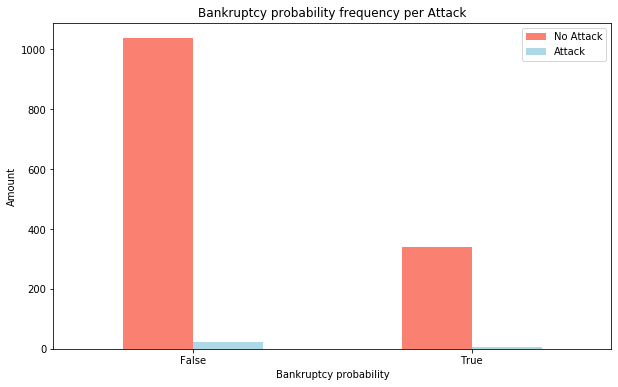

In [40]:
# Making the crosstab more visual
pd.crosstab(df_tmp.diffmoy_Bankruptcy_probability_is_missing, df_tmp.attack).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon", "lightblue"])

# Adding some figure label and title
plt.title("Bankruptcy probability frequency per Attack")
plt.xlabel("Bankruptcy probability")
plt.ylabel("Amount")
plt.legend(["No Attack", "Attack"])
plt.xticks(rotation=0);

#Save the image
plt.savefig('./graphs and plots/Bankruptcy probability frequency per Attack.png')

In [41]:
df_tmp.head()

,company_name,attack,year_attack,Size_of_Group_Composition,BvD_independent_indicator,Number_of_shareholders,Number_of_effective_beneficiaries_def_10_10,Number_of_effective_beneficiaries_def_10_50,Number_of_effective_beneficiaries_def_25_25,Number_of_leaders,...,diffmoy_ROA_from_profit_before_taxes_is_missing,diffmoy_ROCE_from_net_income1_is_missing,diffmoy_R&D_expenditure_Operating_income_is_missing,diffmoy_Performance_is_missing,company_name_is_missing,BvD_independent_indicator_is_missing,DM_As_any_category_is_missing,Manager_Gender_is_missing,Manager_Age_group_is_missing,Director_Also_shareholder_is_missing
0,1,0,2016.0,8.0,6,16,3,3,2,14,...,False,False,False,False,False,False,False,False,False,False
1,2,0,2016.0,2.0,10,17,1,1,1,10,...,False,False,False,False,False,False,False,False,False,False
2,3,0,2016.0,17.0,3,10,3,3,0,18,...,False,False,False,False,False,False,False,False,False,False
3,4,0,2016.0,2.0,10,1,1,1,1,14,...,True,True,True,True,False,False,False,False,False,False
4,5,0,2016.0,85.0,6,6,3,3,2,8,...,False,False,False,False,False,False,False,False,False,False


## Correlation matrix

In [42]:
# Make a correlation matrix
df_tmp.corr()

,company_name,attack,year_attack,Size_of_Group_Composition,BvD_independent_indicator,Number_of_shareholders,Number_of_effective_beneficiaries_def_10_10,Number_of_effective_beneficiaries_def_10_50,Number_of_effective_beneficiaries_def_25_25,Number_of_leaders,...,diffmoy_ROA_from_profit_before_taxes_is_missing,diffmoy_ROCE_from_net_income1_is_missing,diffmoy_R&D_expenditure_Operating_income_is_missing,diffmoy_Performance_is_missing,company_name_is_missing,BvD_independent_indicator_is_missing,DM_As_any_category_is_missing,Manager_Gender_is_missing,Manager_Age_group_is_missing,Director_Also_shareholder_is_missing
company_name,1.000000,-0.013924,0.017953,-0.007150,-0.000260,0.039329,0.032616,0.005711,0.009939,-0.003273,...,-0.026004,-0.064054,-0.066328,-0.038452,NaN,NaN,-0.095006,-0.042416,NaN,-0.095006
attack,-0.013924,1.000000,-0.078569,0.089760,-0.117511,0.258984,-0.018328,-0.010549,-0.030197,0.280883,...,-0.082262,-0.090220,-0.097281,-0.100720,NaN,NaN,-0.021774,-0.041741,NaN,-0.021774
year_attack,0.017953,-0.078569,1.000000,0.000405,-0.021842,0.035919,0.015150,0.026846,0.010411,0.001231,...,-0.021433,-0.007260,-0.011389,-0.019731,NaN,NaN,0.001711,0.003280,NaN,0.001711
Size_of_Group_Composition,-0.007150,0.089760,0.000405,1.000000,0.018573,0.144167,0.002878,-0.011761,0.043195,0.360943,...,-0.033379,0.011127,0.025373,-0.035016,NaN,NaN,-0.048463,-0.013709,NaN,-0.048463
BvD_independent_indicator,-0.000260,-0.117511,-0.021842,0.018573,1.000000,-0.533760,-0.073870,-0.124702,0.037780,-0.330619,...,0.504219,0.449200,0.422869,0.388773,NaN,NaN,0.129883,0.171927,NaN,0.129883
Number_of_shareholders,0.039329,0.258984,0.035919,0.144167,-0.533760,1.000000,0.052174,0.078897,0.005902,0.546092,...,-0.421111,-0.440827,-0.423484,-0.385138,NaN,NaN,-0.078632,-0.140794,NaN,-0.078632
Number_of_effective_beneficiaries_def_10_10,0.032616,-0.018328,0.015150,0.002878,-0.073870,0.052174,1.000000,0.650155,0.545496,0.095786,...,-0.107343,-0.142786,-0.146158,-0.106880,NaN,NaN,-0.071207,-0.014539,NaN,-0.071207
Number_of_effective_beneficiaries_def_10_50,0.005711,-0.010549,0.026846,-0.011761,-0.124702,0.078897,0.650155,1.000000,0.749629,0.062642,...,-0.188236,-0.216688,-0.214620,-0.182371,NaN,NaN,-0.075380,-0.090600,NaN,-0.075380
Number_of_effective_beneficiaries_def_25_25,0.009939,-0.030197,0.010411,0.043195,0.037780,0.005902,0.545496,0.749629,1.000000,0.067474,...,-0.074059,-0.087060,-0.110477,-0.099486,NaN,NaN,-0.061431,-0.051990,NaN,-0.061431
Number_of_leaders,-0.003273,0.280883,0.001231,0.360943,-0.330619,0.546092,0.095786,0.062642,0.067474,1.000000,...,-0.338583,-0.251539,-0.229391,-0.330207,NaN,NaN,-0.159585,-0.123411,NaN,-0.159585


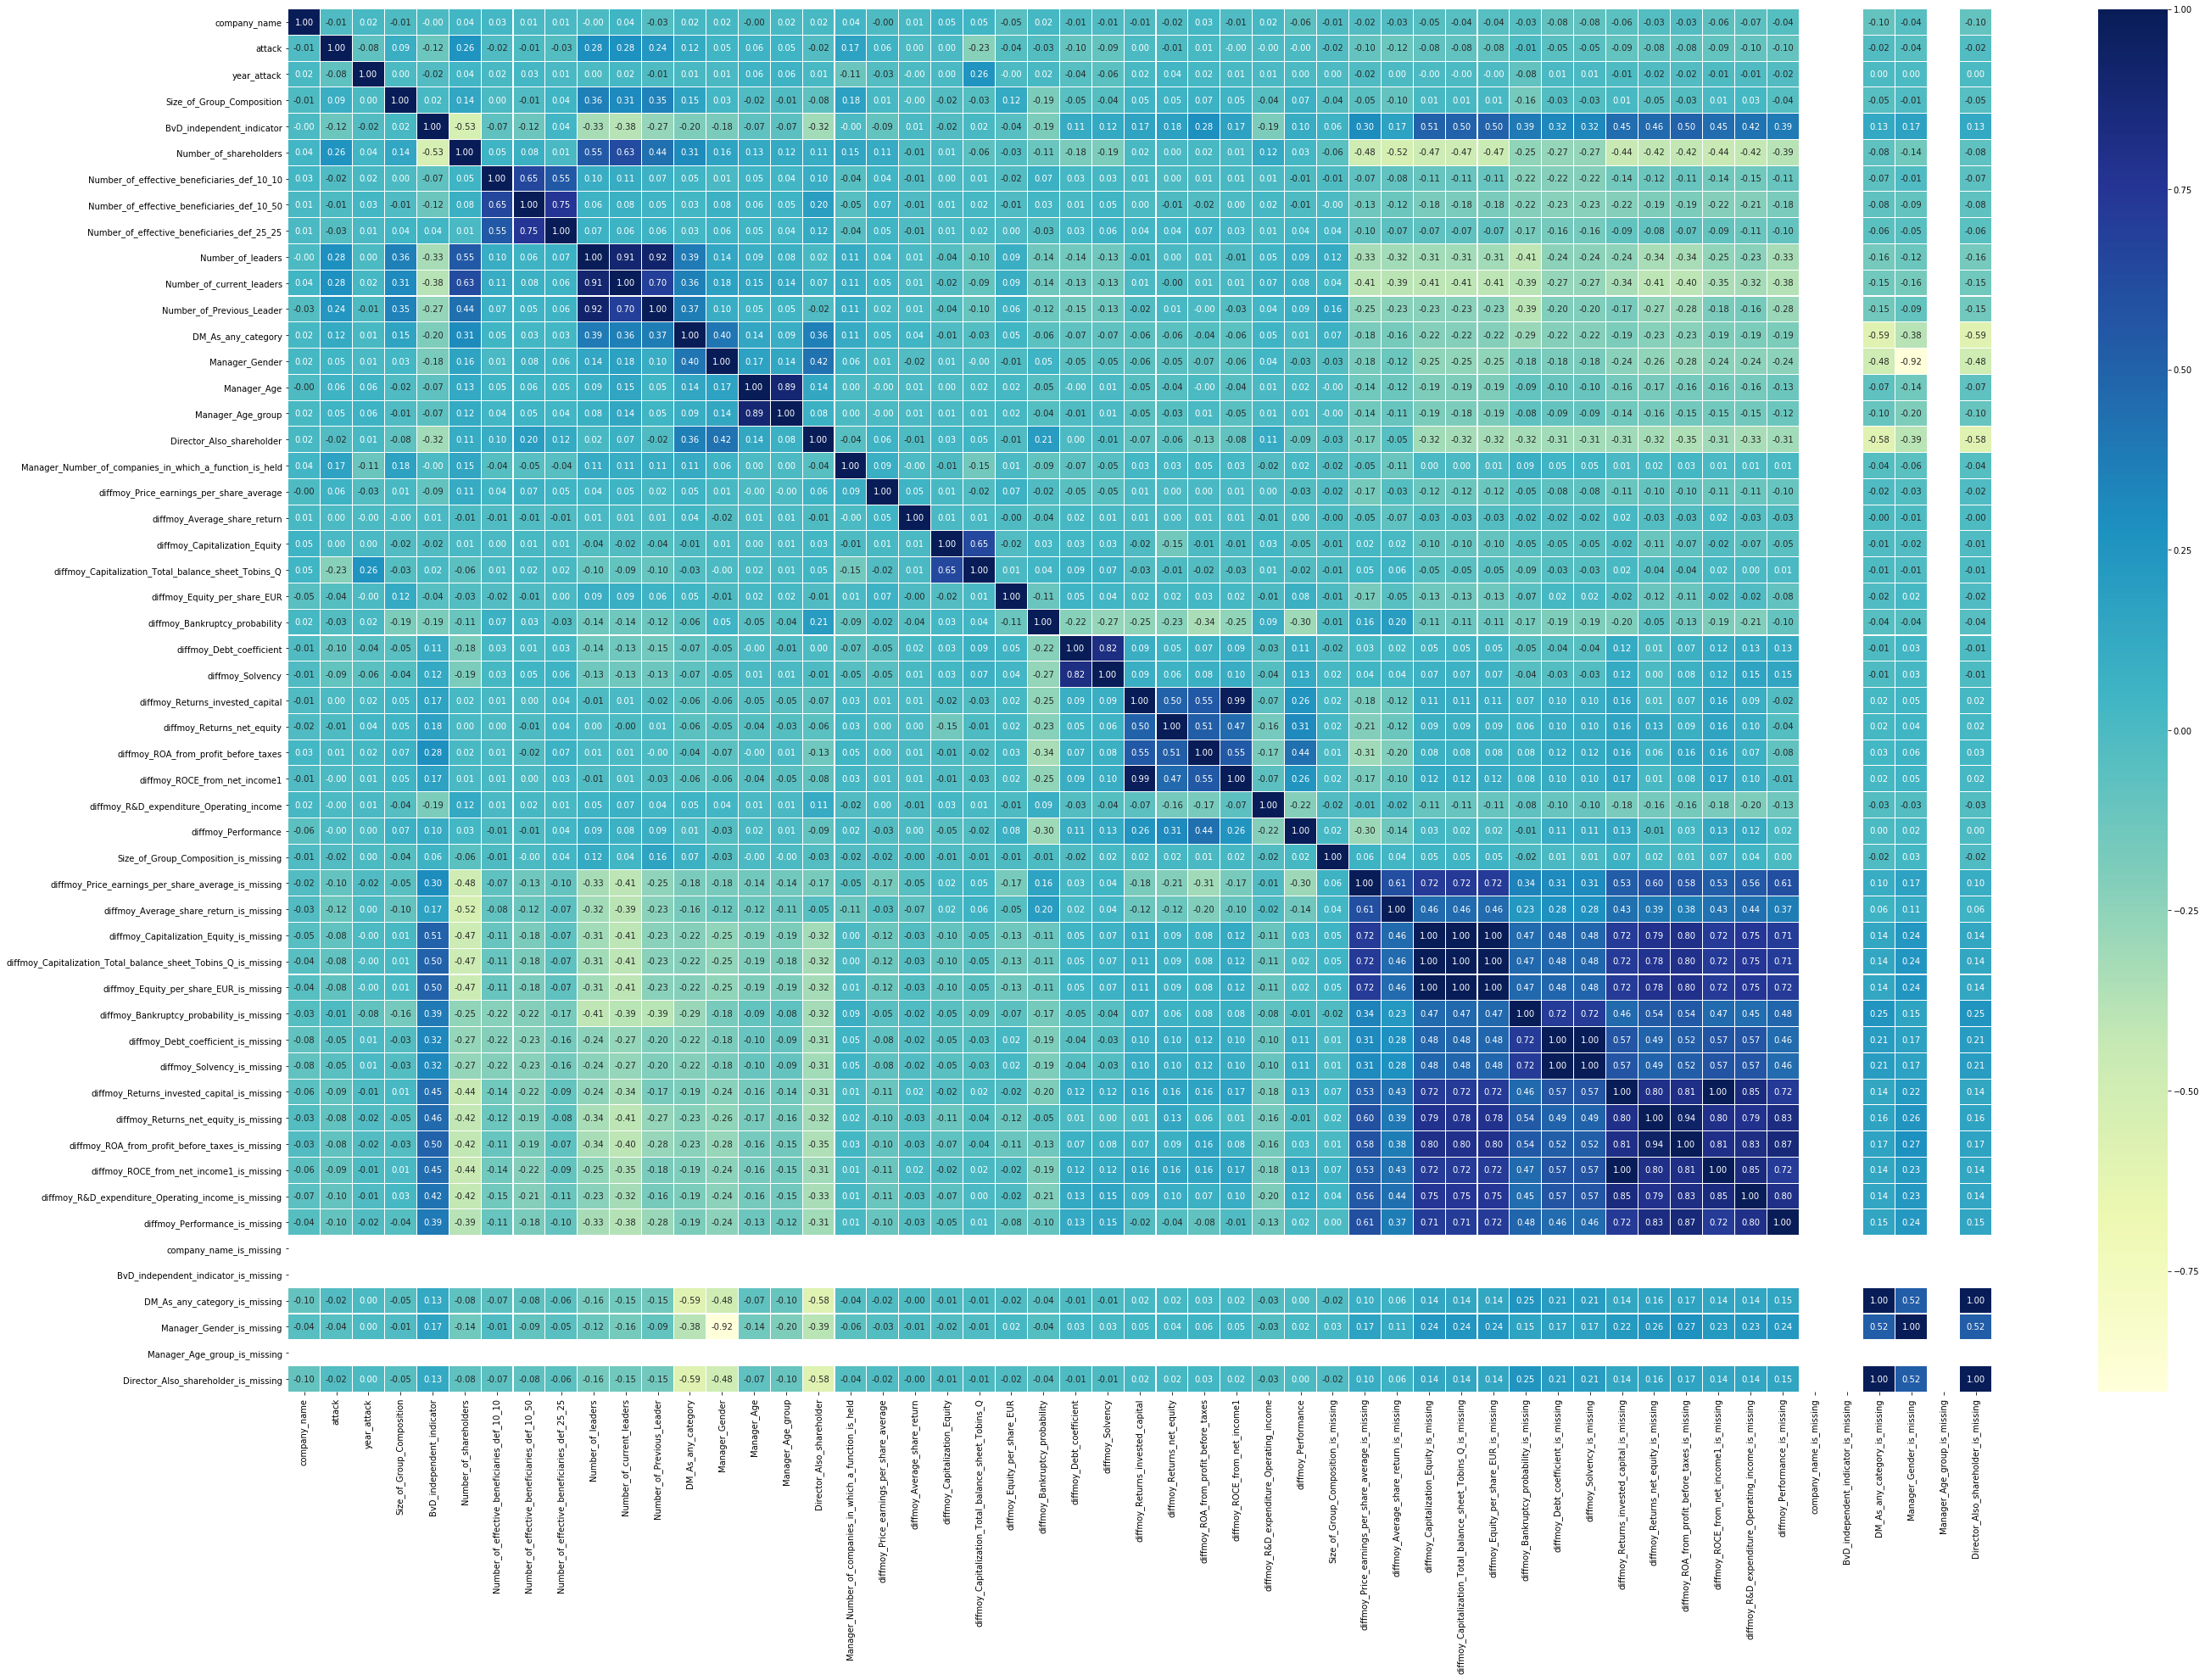

In [43]:
# Let's visualoze the correlation matrix

corr_mtx = df_tmp.corr()
fig, ax = plt.subplots(figsize=(45,30))
ax = sns.heatmap(corr_mtx,
                annot=True,
                linewidths=0.1,
                fmt=".2f",
                cmap="YlGnBu");

#Save the image
plt.savefig('./graphs and plots/correlation Matrix.png')

# Modeling

In [44]:
df_tmp.head()

,company_name,attack,year_attack,Size_of_Group_Composition,BvD_independent_indicator,Number_of_shareholders,Number_of_effective_beneficiaries_def_10_10,Number_of_effective_beneficiaries_def_10_50,Number_of_effective_beneficiaries_def_25_25,Number_of_leaders,...,diffmoy_ROA_from_profit_before_taxes_is_missing,diffmoy_ROCE_from_net_income1_is_missing,diffmoy_R&D_expenditure_Operating_income_is_missing,diffmoy_Performance_is_missing,company_name_is_missing,BvD_independent_indicator_is_missing,DM_As_any_category_is_missing,Manager_Gender_is_missing,Manager_Age_group_is_missing,Director_Also_shareholder_is_missing
0,1,0,2016.0,8.0,6,16,3,3,2,14,...,False,False,False,False,False,False,False,False,False,False
1,2,0,2016.0,2.0,10,17,1,1,1,10,...,False,False,False,False,False,False,False,False,False,False
2,3,0,2016.0,17.0,3,10,3,3,0,18,...,False,False,False,False,False,False,False,False,False,False
3,4,0,2016.0,2.0,10,1,1,1,1,14,...,True,True,True,True,False,False,False,False,False,False
4,5,0,2016.0,85.0,6,6,3,3,2,8,...,False,False,False,False,False,False,False,False,False,False


In [45]:
# Splitting data into X and y

X = df_tmp.drop("attack", axis=1)
y = df_tmp["attack"]

In [46]:
X

,company_name,year_attack,Size_of_Group_Composition,BvD_independent_indicator,Number_of_shareholders,Number_of_effective_beneficiaries_def_10_10,Number_of_effective_beneficiaries_def_10_50,Number_of_effective_beneficiaries_def_25_25,Number_of_leaders,Number_of_current_leaders,...,diffmoy_ROA_from_profit_before_taxes_is_missing,diffmoy_ROCE_from_net_income1_is_missing,diffmoy_R&D_expenditure_Operating_income_is_missing,diffmoy_Performance_is_missing,company_name_is_missing,BvD_independent_indicator_is_missing,DM_As_any_category_is_missing,Manager_Gender_is_missing,Manager_Age_group_is_missing,Director_Also_shareholder_is_missing
0,1,2016.0,8.0,6,16,3,3,2,14,12,...,False,False,False,False,False,False,False,False,False,False
1,2,2016.0,2.0,10,17,1,1,1,10,8,...,False,False,False,False,False,False,False,False,False,False
2,3,2016.0,17.0,3,10,3,3,0,18,9,...,False,False,False,False,False,False,False,False,False,False
3,4,2016.0,2.0,10,1,1,1,1,14,8,...,True,True,True,True,False,False,False,False,False,False
4,5,2016.0,85.0,6,6,3,3,2,8,8,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,760,2018.0,24.0,10,13,5,5,5,60,30,...,False,False,False,False,False,False,False,False,False,False
1403,1121,2019.0,697.0,6,54,0,0,0,127,88,...,False,False,False,False,False,False,False,False,False,False
1404,1150,2017.0,420.0,3,81,0,0,0,151,129,...,False,False,False,False,False,False,False,False,False,False
1405,1294,2012.0,213.0,3,29,0,0,0,73,45,...,False,False,False,False,False,False,False,False,False,False


In [47]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1402    1
1403    1
1404    1
1405    1
1406    1
Name: attack, Length: 1407, dtype: int64

In [48]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                            test_size= 0.2)

In [49]:
X_train

,company_name,year_attack,Size_of_Group_Composition,BvD_independent_indicator,Number_of_shareholders,Number_of_effective_beneficiaries_def_10_10,Number_of_effective_beneficiaries_def_10_50,Number_of_effective_beneficiaries_def_25_25,Number_of_leaders,Number_of_current_leaders,...,diffmoy_ROA_from_profit_before_taxes_is_missing,diffmoy_ROCE_from_net_income1_is_missing,diffmoy_R&D_expenditure_Operating_income_is_missing,diffmoy_Performance_is_missing,company_name_is_missing,BvD_independent_indicator_is_missing,DM_As_any_category_is_missing,Manager_Gender_is_missing,Manager_Age_group_is_missing,Director_Also_shareholder_is_missing
70,74,2016.0,24.0,6,31,2,2,1,22,18,...,False,False,False,False,False,False,False,False,False,False
1367,1382,2016.0,0.0,10,3,4,2,4,15,10,...,False,False,False,False,False,False,False,False,False,False
1280,1293,2016.0,2.0,10,1,0,0,0,14,7,...,True,True,True,True,False,False,False,False,False,False
913,921,2016.0,2.0,10,3,2,2,2,22,20,...,False,False,False,False,False,False,False,False,False,False
557,564,2016.0,89.0,3,70,0,0,0,81,42,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,1152,2016.0,0.0,11,0,0,0,0,8,0,...,True,True,True,True,False,False,False,False,False,False
28,30,2016.0,5.0,6,12,4,4,3,24,23,...,False,False,False,False,False,False,False,False,False,False
1384,1400,2016.0,986.0,10,33,1,1,1,72,56,...,False,False,False,False,False,False,False,False,False,False
788,796,2016.0,10.0,10,2,3,3,2,22,19,...,False,True,False,False,False,False,False,False,False,False


In [50]:
y_train

70      0
1367    0
1280    0
913     0
557     0
       ..
1139    0
28      0
1384    0
788     0
1129    0
Name: attack, Length: 1125, dtype: int64

### Now we've got our data split into training and test sets, it's time to build a machine learning model.

We'll train it (find the patterns) on the training set.

And we'll test it (use the patterns) on the test set.

We're going to try 3 different machine learning models:

1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [51]:
# Put models in a dictionary 
models = {"Logisitc Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates give machine learning models.
    models: a dictionary of different scikit-learn machine learning models
    X_train : training data (no labels)
    X_test: testing data (no labels)
    y_train : training labels
    y_test : testing labels
    """
    # Set random seed
    np.random.seed(42)
    
    # Make a empty dictionary to keep model scores
    model_scores = {}
    
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [52]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)
model_scores

C:\Users\rakib\Desktop\ml-projects\project-env\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logisitc Regression': 0.9893617021276596,
 'KNN': 0.9858156028368794,
 'Random Forest': 0.9893617021276596}

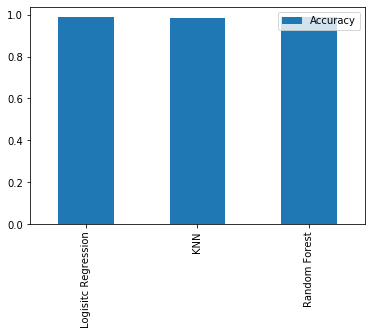

In [53]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar();

#Save the image
plt.savefig('./graphs and plots/Model Accuracy.png')

### Now we've got a baseline model.

We will perform the following:

- Hypyterparameter tuning
- Feature importance
- Confusion matrix
- Cross-validation
- Precision
- Recall
- F1 score
- Classification report
- ROC curve
- Area under the curve (AUC)

## Hyperparameter tuning with RandomizedSearchCV

As we already have very goof result, still we will tune our model to get more better result

We're going to tune:

- LogisticRegression()
- RandomForestClassifier()

In [54]:
# Creating a hyperparameter grid for LogisticRegression
lr_grid = {"C": np.logspace(-4, 4, 20),
               "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [55]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
log_reg = RandomizedSearchCV(LogisticRegression(),
                            param_distributions=lr_grid,
                            cv = 5,
                            n_iter = 20,
                            verbose = True)

# Fit random hyperparameter search model for LogisticRegression

log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\rakib\Desktop\ml-projects\project-env\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rakib\Desktop\ml-projects\project-env\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rakib\Desktop\ml-projects\project-env\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rakib\Desktop\ml-projects\project-env\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinea

C:\Users\rakib\Desktop\ml-projects\project-env\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rakib\Desktop\ml-projects\project-env\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rakib\Desktop\ml-projects\project-env\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rakib\Desktop\ml-projects\project-env\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rakib\Desktop\ml-projects\project-env\e

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [56]:
# Let;s find the best feature 
log_reg.best_params_

{'solver': 'liblinear', 'C': 0.00026366508987303583}

In [57]:
log_reg.score(X_test, y_test)

0.9893617021276596

##### Now, we've tuned LogisticRegression(), let's do the same for RandomForestClassifier().

In [58]:
# Setup random seed
np.random.seed(42)

# Setup random hyperperameter search for RandomForestClassifier 
rf_clf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions= rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

# Fit random hyperparameter search for RandomForestClassifier()
rf_clf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.1min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [59]:
# Find the best hyperparameters
rf_clf.best_params_

{'n_estimators': 910,
 'min_samples_split': 18,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [60]:
print(f'The score is: {rf_clf.score(X_test, y_test)*100:.2f}%')

The score is: 98.94%


## Hyperparameter Tuning with GridSearchCV

Since our LogisticRegression model provides the best scores so far, we'll try and improve them again using GridSearchCV.

In [61]:
# Different hyperparameters for our Logistic Regression model

Log_reg_grid = {"C": np.logspace(-4, 4, 30),
               "solver": ["liblinear"]}

# Setup grid hyperparameter search for LogisticRegression()

gs_log_reg = GridSearchCV(LogisticRegression(),
                    param_grid= Log_reg_grid,
                    cv = 5,
                    verbose = True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\rakib\Desktop\ml-projects\project-env\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rakib\Desktop\ml-projects\project-env\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rakib\Desktop\ml-projects\project-env\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rakib\Desktop\ml-projects\project-env\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinea

C:\Users\rakib\Desktop\ml-projects\project-env\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rakib\Desktop\ml-projects\project-env\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rakib\Desktop\ml-projects\project-env\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rakib\Desktop\ml-projects\project-env\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\rakib\Desktop\ml-projects\project-env\e

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-04, 1.8...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5

In [62]:
# Check for the best hyperparameters
gs_log_reg.best_params_

{'C': 0.002395026619987486, 'solver': 'liblinear'}

In [63]:
gs_log_reg.score(X_test, y_test)

0.9893617021276596

### Evaluting our tuned machine learning classifier, beyond accuracy

- ROC curve and AUC score
- Confusion matrix
- Classification report
- Precision
- Recall
- F1-score

It would be great if cross-validation was used where possible.

To make comparisons and evaluate our trained model, first we need to make predictions.

In [64]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [65]:
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [66]:
y_test

146     0
977     0
1063    0
903     0
315     0
       ..
151     0
1067    0
520     0
771     0
35      0
Name: attack, Length: 282, dtype: int64

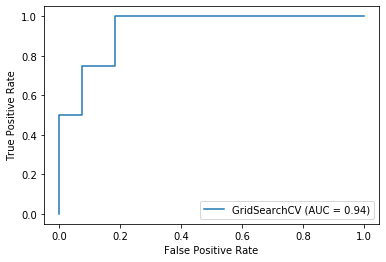

In [67]:
# Plot ROC curve and calculate AUC metric

plot_roc_curve(gs_log_reg, X_test, y_test);


#Save the image
plt.savefig('./graphs and plots/ROC curve.png')

In [68]:
# Confussion Matrix
print(confusion_matrix(y_test, y_preds))

[[278   0]
 [  3   1]]


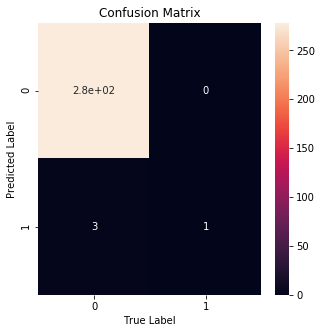

In [69]:
# Visualize confusion matrix

def plot_conf_mtx(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(5,5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot= True,
                    cbar= True)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    plt.title("Confusion Matrix")


plot_conf_mtx(y_test, y_preds)

#Save the image
plt.savefig('./graphs and plots/confussion matrix.png')

In [70]:
# Classificarion Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       278
           1       1.00      0.25      0.40         4

    accuracy                           0.99       282
   macro avg       0.99      0.62      0.70       282
weighted avg       0.99      0.99      0.99       282



## Feature Importance

Feature importance is another as asking, "which features contributed most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each machine learning model. One way to find feature importance is to search for "(MODEL NAME) feature importance".

Let's find the feature importance for our LogisticRegression model.

In [72]:
# Fit the instance of LogisticRegression
clf = LogisticRegression(C=0.38566204211634725,
                        solver="liblinear")
clf.fit(X_train, y_train);

In [73]:
# Checking coefficients
clf.coef_

array([[-6.12756740e-04, -4.96086285e-03, -2.74167268e-04,
        -5.73394937e-02,  2.55432796e-02, -1.05367339e-01,
         1.27945649e-01, -2.24608083e-01,  7.24514940e-02,
        -3.72359606e-02, -3.50945780e-02,  3.51797831e-01,
         4.51525279e-01,  2.13049045e-02, -1.17400977e-01,
        -2.00098089e-01,  1.32914197e-03,  1.59674803e-03,
         3.82507906e-04,  2.76477268e-02, -2.87240701e-01,
        -1.82351816e-02,  5.46768110e-02,  9.95555481e-02,
        -1.40595281e-01,  3.81374627e-02, -1.40809302e-03,
         6.51660050e-02, -4.41121346e-02, -5.85136432e-02,
        -2.92355701e-02, -2.17194476e-01, -1.45473741e-01,
         1.51759922e-01,  3.03042017e-01,  3.03274649e-01,
         3.03274663e-01, -5.27365996e-03,  1.08981916e-01,
         1.08981916e-01, -2.22104080e-02,  2.94792527e-02,
         7.87344358e-02,  1.14536797e-02, -1.08114163e-01,
        -2.73376644e-02,  0.00000000e+00,  0.00000000e+00,
        -1.45312939e-02, -6.54519748e-02,  0.00000000e+0

In [74]:
df_tmp.head()

,company_name,attack,year_attack,Size_of_Group_Composition,BvD_independent_indicator,Number_of_shareholders,Number_of_effective_beneficiaries_def_10_10,Number_of_effective_beneficiaries_def_10_50,Number_of_effective_beneficiaries_def_25_25,Number_of_leaders,...,diffmoy_ROA_from_profit_before_taxes_is_missing,diffmoy_ROCE_from_net_income1_is_missing,diffmoy_R&D_expenditure_Operating_income_is_missing,diffmoy_Performance_is_missing,company_name_is_missing,BvD_independent_indicator_is_missing,DM_As_any_category_is_missing,Manager_Gender_is_missing,Manager_Age_group_is_missing,Director_Also_shareholder_is_missing
0,1,0,2016.0,8.0,6,16,3,3,2,14,...,False,False,False,False,False,False,False,False,False,False
1,2,0,2016.0,2.0,10,17,1,1,1,10,...,False,False,False,False,False,False,False,False,False,False
2,3,0,2016.0,17.0,3,10,3,3,0,18,...,False,False,False,False,False,False,False,False,False,False
3,4,0,2016.0,2.0,10,1,1,1,1,14,...,True,True,True,True,False,False,False,False,False,False
4,5,0,2016.0,85.0,6,6,3,3,2,8,...,False,False,False,False,False,False,False,False,False,False


#### Let's find the best features

In [75]:
# Match coef's of features to columns

feature_dictionary = dict(zip(df_tmp.columns, list(clf.coef_[0])))
feature_dictionary

{'company_name': -0.0006127567401874651,
 'attack': -0.004960862853399066,
 'year_attack': -0.0002741672678757605,
 'Size_of_Group_Composition': -0.05733949374572624,
 'BvD_independent_indicator': 0.02554327959644141,
 'Number_of_shareholders': -0.10536733896207655,
 'Number_of_effective_beneficiaries_def_10_10': 0.1279456485785886,
 'Number_of_effective_beneficiaries_def_10_50': -0.22460808276807642,
 'Number_of_effective_beneficiaries_def_25_25': 0.07245149397354099,
 'Number_of_leaders': -0.03723596055542469,
 'Number_of_current_leaders': -0.035094578018101195,
 'Number_of_Previous_Leader': 0.35179783070621434,
 'DM_As_any_category': 0.45152527909767703,
 'Manager_Gender': 0.021304904495859193,
 'Manager_Age': -0.11740097716002125,
 'Manager_Age_group': -0.20009808887303698,
 'Director_Also_shareholder': 0.001329141968771897,
 'Manager_Number_of_companies_in_which_a_function_is_held': 0.0015967480254822633,
 'diffmoy_Price_earnings_per_share_average': 0.00038250790626254036,
 'diffm

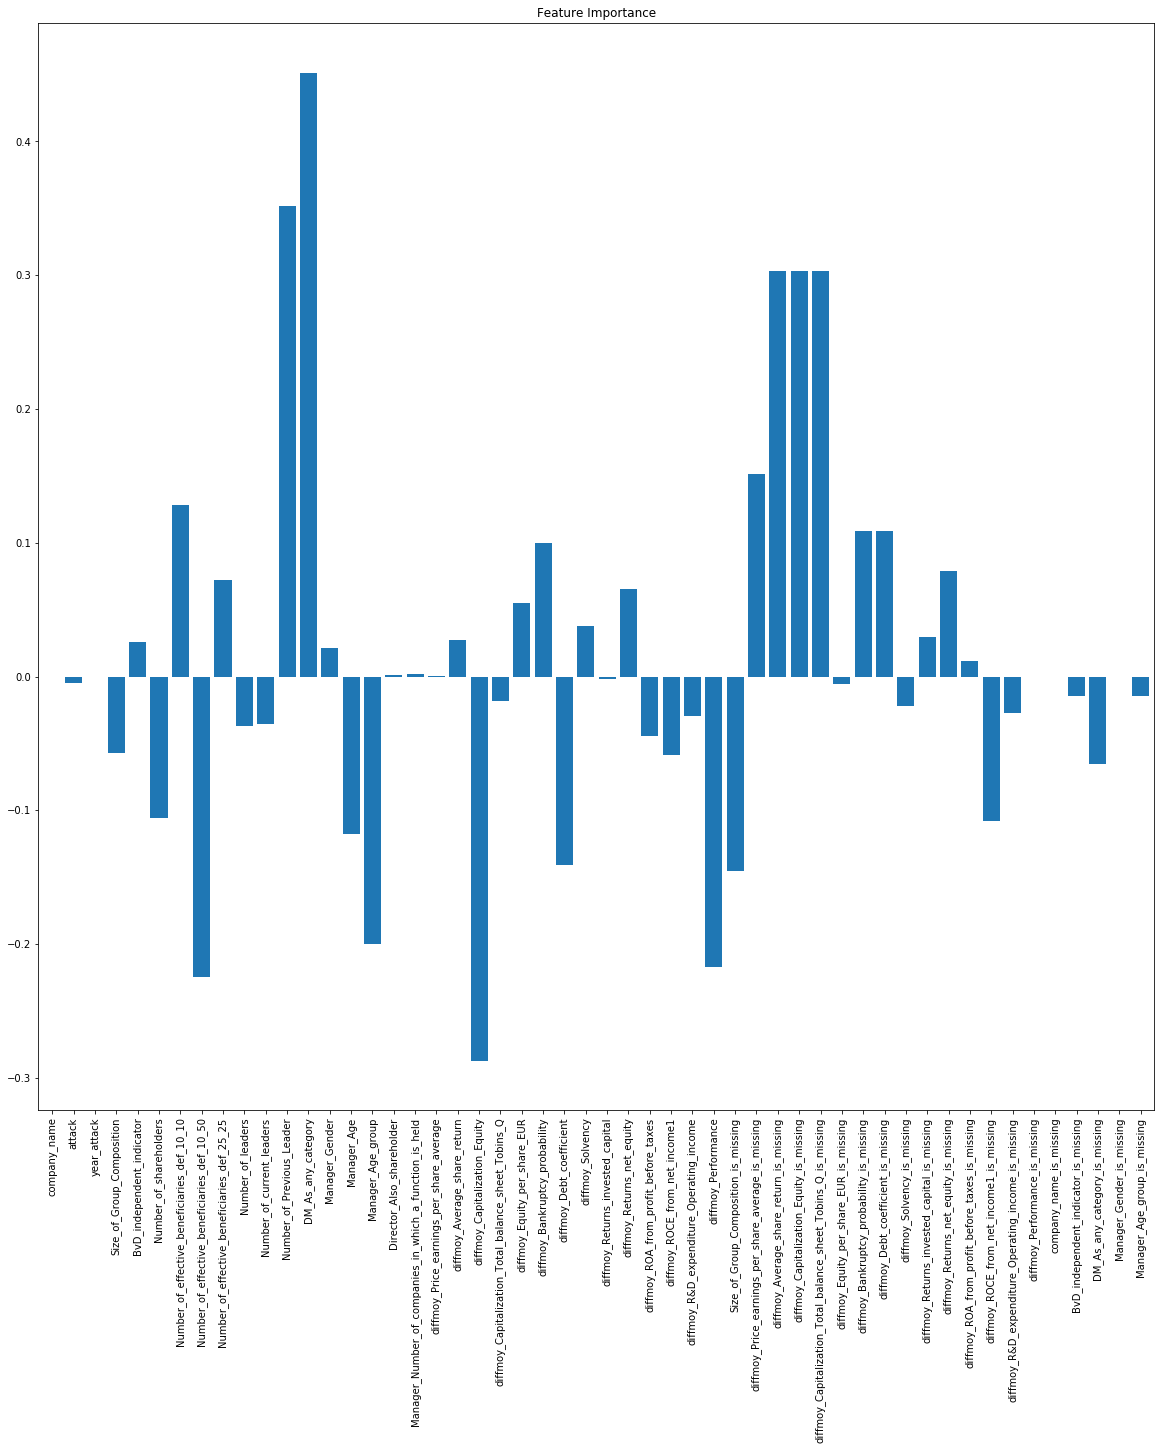

In [97]:
# Visualize the feature importance
feature_df = pd.DataFrame(feature_dictionary, index=[0])
feature_df.T.plot(figsize=(20,20), kind="bar",title="Feature Importance", legend=False, width= 0.8);

#Save the image
plt.savefig('./graphs and plots/feature importance.png')